# Visualization of a grid of a minst digit over another image

In [36]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [38]:
from src.data_generation.load_data import load_mnist, load_cifar_10
from src.data_generation.create_data import overlay_small_img_on_large_img_grid
import src.data_generation
from src.data_generation.utils import downsample_img, normalize_img

In [39]:
import importlib
importlib.reload(src.data_generation.load_data)
from src.data_generation.load_data import sample_uniformly_imgs

In [40]:
import src.data_generation
from src.data_generation.Dataset import Dataset
import importlib

importlib.reload(src.data_generation.Dataset)
from src.data_generation.Dataset import Dataset

In [41]:
cifar10_dataset_train, cifar10_dataset_test = load_cifar_10()
dataset = Dataset()
images = dataset.generate_multi_digits_on_another_dataset_grid(
            cifar10_dataset_train, n_images=4, n_repetition_digit_img=9,
            n_cells_in_grid=9)


Files already downloaded and verified
Files already downloaded and verified


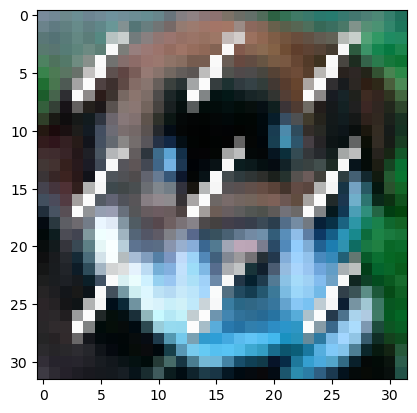

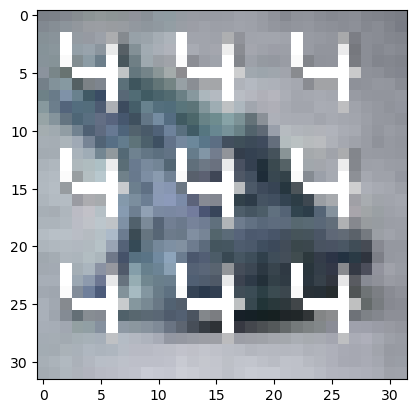

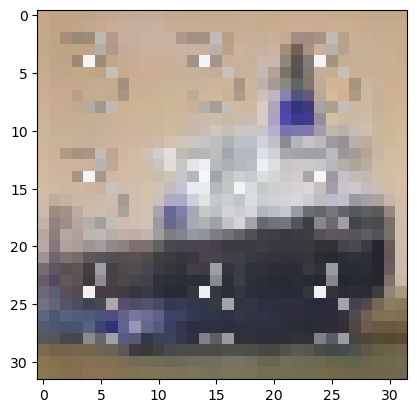

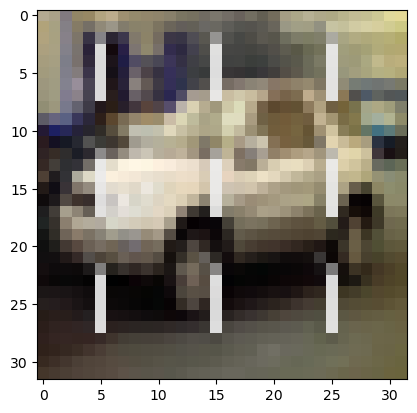

In [42]:
for img in images:
    plt.imshow(img)
    plt.show()

In [43]:
# Load dog image
example_dog_file_path = '../../data/dog000.npz'

loaded = np.load(example_dog_file_path)
img = loaded['image']
img = np.moveaxis(img, 0, -1)

full_size = 448
img = downsample_img(img, full_size, full_size, False)

img = normalize_img(img, min_value=0, max_value=255, return_int_values=True)

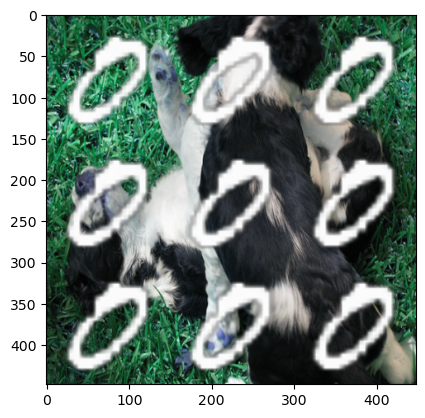

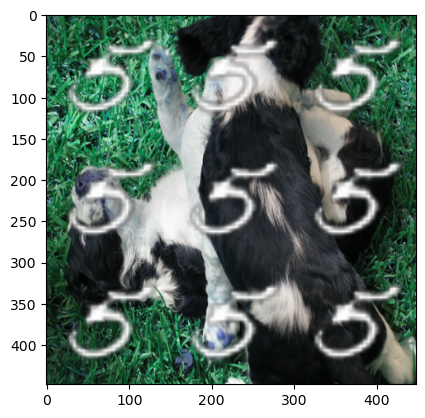

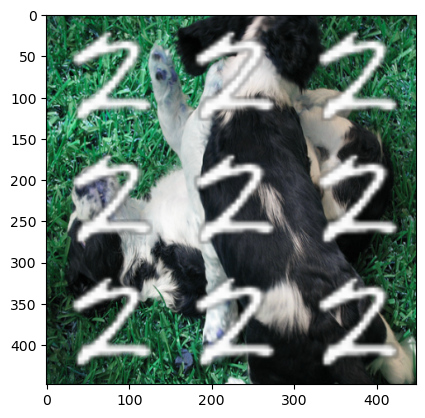

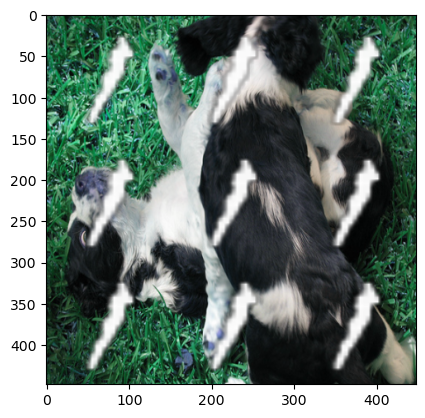

In [44]:
n_sampled_digits = 4
num_cells_grid = 9
n_repetitions_small_img = 9

mnist_dataset_train, mnist_dataset_test = load_mnist()

sampled_digit_images = sample_uniformly_imgs(
    mnist_dataset_train, n_sampled_digits)

for sampled_digit_img in sampled_digit_images:
    overlay_small_img_on_large_img_grid(sampled_digit_img, img,
                                        num_cells_grid,
                                        n_repetitions_small_img,
                                        is_large_img_grayscale=False,
                                        plot=True);